##Multilayer Perceptron

In [1]:
import pandas as pd

dataset = pd.read_csv("https://raw.githubusercontent.com/ect-info/ml/master/dados/Social_Network_Ads.csv")
dataset.head() 

,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510,Male,19,19000,0
1,15810944,Male,35,20000,0
2,15668575,Female,26,43000,0
3,15603246,Female,27,57000,0
4,15804002,Male,19,76000,0


#Atributos escolhidos foram Salário (Estimated Salary) e idade (Age)

In [2]:
X = dataset.iloc[:,2:4].values
y = dataset['Purchased'].values

#Dividindo conjunto para ser treinado

In [3]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 0)

#Normalizando esse conjunto

In [4]:
from sklearn.preprocessing import MinMaxScaler
sc = MinMaxScaler()
X_train = sc.fit_transform(X_train)

X_test = sc.transform(X_test)

#Treinamento do conjunto normalizado

In [5]:
import tensorflow as tf

classifier = tf.keras.models.Sequential()

classifier.add( tf.keras.layers.Dense( activation = 'relu', input_dim = 2, units = 4, kernel_initializer = 'uniform'))

classifier.add( tf.keras.layers.Dense( activation = 'sigmoid', units = 1, kernel_initializer = 'uniform'))

classifier.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics = ['accuracy'])

#Treinamento em sí

In [6]:
classifier.fit(X_train, y_train, batch_size = 1, epochs = 81)

Epoch 1/81
300/300 [==============================] - 1s 938us/step - loss: 0.6897 - accuracy: 0.6459
Epoch 2/81
300/300 [==============================] - 0s 984us/step - loss: 0.6832 - accuracy: 0.5961
Epoch 3/81
300/300 [==============================] - 0s 989us/step - loss: 0.6689 - accuracy: 0.6204
Epoch 4/81
300/300 [==============================] - 0s 961us/step - loss: 0.6595 - accuracy: 0.6127
Epoch 5/81
300/300 [==============================] - 0s 954us/step - loss: 0.6355 - accuracy: 0.6395
Epoch 6/81
300/300 [==============================] - 0s 938us/step - loss: 0.6140 - accuracy: 0.6445
Epoch 7/81
300/300 [==============================] - 0s 955us/step - loss: 0.5980 - accuracy: 0.6506
Epoch 8/81
300/300 [==============================] - 0s 916us/step - loss: 0.5508 - accuracy: 0.7138
Epoch 9/81
300/300 [==============================] - 0s 949us/step - loss: 0.5562 - accuracy: 0.7477
Epoch 10/81
300/300 [==============================] - 0s 987us/step - loss: 0.517

#Verificando a eficiência do modelo

In [7]:
y_pred = classifier.predict(X_test)

print(y_test[0:35])
print(y_pred[0:35])

[0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 1 0 0 1 0 1 0 1 0 0 0 0 0 1 1 0 0]
[[7.7252209e-02]
 [1.3255024e-01]
 [1.7350066e-01]
 [5.3610802e-02]
 [5.8320403e-02]
 [1.2860596e-03]
 [3.3519566e-03]
 [7.9373932e-01]
 [8.9257956e-04]
 [6.1986220e-01]
 [1.2923002e-02]
 [9.5194578e-03]
 [1.2614354e-01]
 [4.3555915e-01]
 [3.9131045e-03]
 [3.9810508e-01]
 [2.9707128e-01]
 [2.7610362e-03]
 [9.2642307e-01]
 [1.5536666e-02]
 [5.0777167e-02]
 [8.9844465e-01]
 [2.8360498e-01]
 [8.5591209e-01]
 [5.9065223e-04]
 [9.0665013e-01]
 [4.3840826e-02]
 [4.2163789e-02]
 [1.6886374e-01]
 [1.2707973e-01]
 [5.8188736e-03]
 [3.1785914e-01]
 [8.7457752e-01]
 [1.1576593e-01]
 [3.3264160e-03]]


In [8]:
y_pred_bin = [ ( 1 if elem > 0.5 else 0) for elem in y_pred ] 

In [10]:
import numpy as np
from sklearn.metrics import accuracy_score
y_pred_bin =  np.array(y_pred_bin)
print(y_test[0:35])
print(y_pred_bin[0:35])

print("Acurácia: ", accuracy_score(y_test,y_pred_bin)*100, "%"  )

[0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 1 0 0 1 0 1 0 1 0 0 0 0 0 1 1 0 0]
[0 0 0 0 0 0 0 1 0 1 0 0 0 0 0 0 0 0 1 0 0 1 0 1 0 1 0 0 0 0 0 0 1 0 0]
Acurácia:  89.0 %


#Matriz de confusão

In [12]:
from sklearn.metrics import confusion_matrix
matriz_confusao = confusion_matrix(y_test, y_pred_bin)
print("Matrix de confusão: ")
print(matriz_confusao)

Matrix de confusão: 
[[62  6]
 [ 5 27]]


#Mostrando resultados de forma gráfica

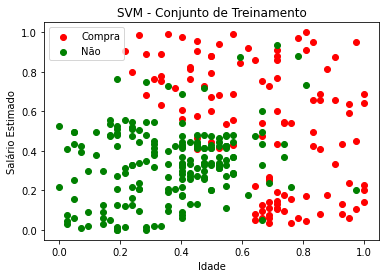

In [13]:
import matplotlib.pyplot as plt

# Seleção dos elementos classificados como negativos (não compra)
age_neg = X_train[y_train == 0, 0]
salary_neg = X_train[y_train == 0, 1]
age_pos = X_train[y_train == 1, 0]
salary_pos = X_train[y_train == 1, 1]

plt.scatter(age_pos,salary_pos, color='red', label = 'Compra')
plt.scatter(age_neg,salary_neg, color='green', label = 'Não')

plt.title('SVM - Conjunto de Treinamento')
plt.xlabel('Idade')
plt.ylabel('Salário Estimado')
plt.legend()
plt.show()

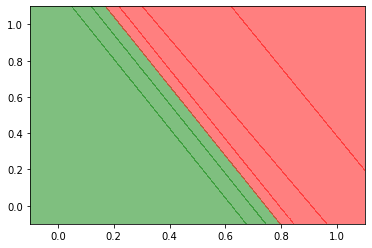

In [14]:
vx = np.arange(-0.1, 1.1, 0.025) 
vy = np.arange(-0.1, 1.1, 0.025)
X1, X2 = np.meshgrid(vx,vy) 

y_pred_mesh =  classifier.predict(np.array([X1.ravel(),X2.ravel()]).T ).reshape(X1.shape)

from matplotlib.colors import ListedColormap
plt.contourf(X1,X2, y_pred_mesh, alpha  = 0.5, cmap = ListedColormap(('green','red')))

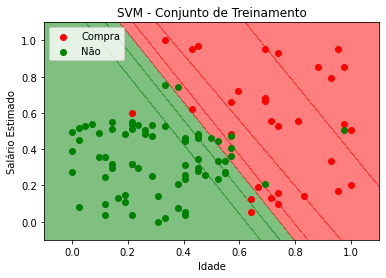

In [15]:
age_neg = X_test[y_test == 0, 0]
salary_neg = X_test[y_test == 0, 1]
age_pos = X_test[y_test == 1, 0]
salary_pos = X_test[y_test == 1, 1]

plt.contourf(X1,X2, y_pred_mesh, alpha  = 0.5, cmap = ListedColormap(('green','red')))

plt.scatter(age_pos,salary_pos, color='red', label = 'Compra')
plt.scatter(age_neg,salary_neg, color='green', label = 'Não')

plt.title('SVM - Conjunto de Treinamento')
plt.xlabel('Idade')
plt.ylabel('Salário Estimado')
plt.legend()
plt.show()